In [2]:
pip install matplotlib

     |████████████████████████████████| 11.3 MB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 899 kB 47.1 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 1.2 MB 57.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 41.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def draw_contours(org_img, thresholded):
    contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    copy_img = org_img.copy()
    for j in range(len(contours)):
        cnt = contours[j]
        if cv2.contourArea(cnt) >= 200:
            cv2.drawContours(copy_img, [cnt], 0, (0, 255, 0), 3)
    return copy_img

In [5]:
def plot_figures(figures, nrows=1, ncols=1):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind, title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title],cv2.COLOR_BGR2RGB),cmap='gray')
        axeslist.ravel()[ind].set_title(title if ind < 7 else '')
        axeslist.ravel()[ind].set_axis_off()

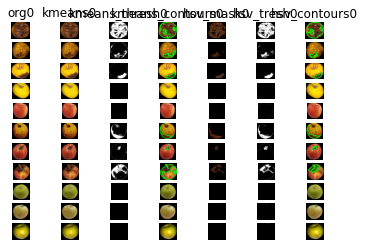

In [6]:
figures = {}

for i in range(11):
    img = cv2.imread(f'Data/img/apple{i+1}.png')
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    Z = img.reshape((-1, 3))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 1.0)
    K = 8
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10,
                                    cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    clustered = res.reshape((img.shape))

    lower = np.array([(6,0,50)])
    upper = np.array([(12,255,130)])
    mask = cv2.inRange(hsv, lower, upper)
    bitwise = cv2.bitwise_and(img, img, mask=mask)

    cluster_hsv = cv2.cvtColor(clustered, cv2.COLOR_BGR2HSV)
    mask_cluster = cv2.inRange(cluster_hsv, lower, upper)
    kmeans_thresh = cv2.threshold(mask_cluster, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    hsv_mask_threshold = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    hsv_contours = draw_contours(img, hsv_mask_threshold)
    kmeans_contours = draw_contours(img, kmeans_thresh)
    dictionary = {
        f'org{i}': img,
        f'kmeans{i}': clustered,
        f'kmeans_thresh{i}': kmeans_thresh,
        f'kmeans_contours{i}': kmeans_contours,
        f'hsv_mask{i}': bitwise,
        f'hsv_tresh{i}': hsv_mask_threshold,
        f'hsv_contours{i}': hsv_contours,
    }
    if len(figures) == 0:
        figures = {**dictionary}
    else:
        figures = {**figures, **dictionary}

plot_figures(figures, int(len(figures)/7), 7)
plt.show()